# Day 2 - linear regression yet again

Today I will implement linear regression based on this guide: [https://python.datasciencebook.ca/regression2.html#linear-regression-in-python]

The dataset that will be used is from here: [https://github.com/TheEconomist/big-mac-data/blob/master/source-data/big-mac-source-data-v2.csv]
Which is a dataset of the big mac prices across the world, as well as the gdp of countries made by The Economist.

Here, my goal will be to predict the price of a big mac, based on the GDP of a country.

In [3]:
import pandas as pd

data = pd.read_csv("big-mac-source-data-v2.csv")

In [4]:
data.head()

,name,iso_a3,currency_code,local_price,dollar_ex,GDP_dollar,GDP_local,date
0,Argentina,ARG,ARS,2.50,1.00,9283.175,9283.175,2000-04-01
1,Australia,AUS,AUD,2.59,1.68,20394.027,32402.454,2000-04-01
2,Brazil,BRA,BRL,2.95,1.79,5123.549,5941.865,2000-04-01
3,Canada,CAN,CAD,2.85,1.47,21046.556,31222.677,2000-04-01
4,Switzerland,CHE,CHF,5.90,1.70,42737.474,61961.359,2000-04-01


First, we need to create a new column for the price of big macs as :
| Variables | Definition | 
| --- | --- |
| local_price | Price of a Big Mac in the local currency |
| dollar_ex | Local currency units per dollar |

Therefore we need to divide local price by the dollar_ex column to get the actual dollar value for each country

In [5]:
data["dollar_price"] = data["local_price"] / data["dollar_ex"]

In [6]:
data.head()

,name,iso_a3,currency_code,local_price,dollar_ex,GDP_dollar,GDP_local,date,dollar_price
0,Argentina,ARG,ARS,2.50,1.00,9283.175,9283.175,2000-04-01,2.500000
1,Australia,AUS,AUD,2.59,1.68,20394.027,32402.454,2000-04-01,1.541667
2,Brazil,BRA,BRL,2.95,1.79,5123.549,5941.865,2000-04-01,1.648045
3,Canada,CAN,CAD,2.85,1.47,21046.556,31222.677,2000-04-01,1.938776
4,Switzerland,CHE,CHF,5.90,1.70,42737.474,61961.359,2000-04-01,3.470588


Let's try and plot dollar_price to GDP in dollars

In [8]:
import seaborn as sns

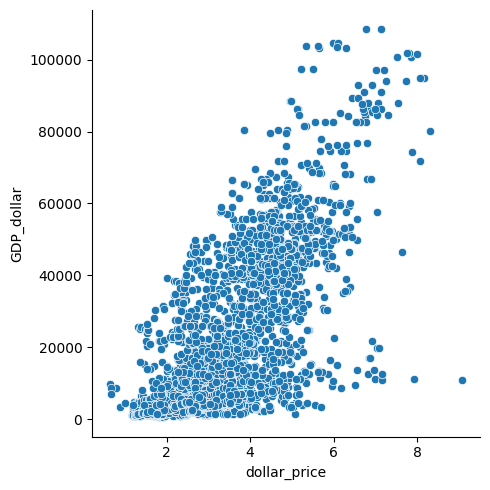

In [14]:
sns.relplot(
    data=data,
    x="dollar_price", y="GDP_dollar"
)

We can from the above graph observe a generally linear relationship between the price of a big mac and the gdp of a country. 

Let's see the same data but for 2025 only

In [15]:
data["date"].max

<bound method Series.max of 0       2000-04-01
1       2000-04-01
2       2000-04-01
3       2000-04-01
4       2000-04-01
           ...    
2297    2025-01-01
2298    2025-01-01
2299    2025-01-01
2300    2025-01-01
2301    2025-01-01
Name: date, Length: 2302, dtype: object>

In [27]:
# create a Boolean mask for the rows to remove
mask = data['date'] == '2025-01-01'

# select all rows except the ones that contain 'Coca Cola'
data2025 = data[mask]

In [28]:
data2025.head()

,name,iso_a3,currency_code,local_price,dollar_ex,GDP_dollar,GDP_local,date,dollar_price
2231,United Arab Emirates,ARE,AED,18.00,3.672900,48140.644,176796.517,2025-01-01,4.900760
2232,Argentina,ARG,ARS,7300.00,1050.000100,13823.346,4098855.728,2025-01-01,6.952380
2233,Australia,AUS,AUD,7.75,1.591216,64546.866,97088.200,2025-01-01,4.870488
2234,Austria,AUT,EUR,5.17,0.952470,56856.125,52567.632,2025-01-01,5.427992
2235,Azerbaijan,AZE,AZN,6.24,1.700000,7144.807,12146.172,2025-01-01,3.670588


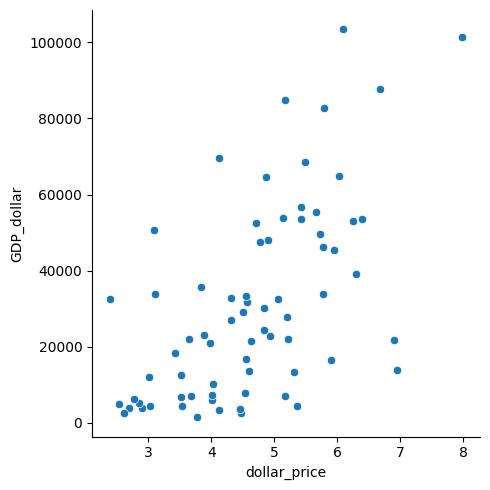

In [29]:
sns.relplot(
    data=data2025,
    x="dollar_price", y="GDP_dollar"
)

In [31]:
import numpy as np
import altair as alt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import set_config

In [32]:
# Output dataframes instead of arrays
set_config(transform_output="pandas")

In [38]:
# Initializing the training and test sets
data2025_train, data2025_test = train_test_split(data2025, test_size=0.75)

In [55]:
# Fitting the model
lm = LinearRegression()
lm.fit(
    data_train[["GDP_dollar"]],
    data_train["dollar_price"]
)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [40]:
pd.DataFrame({"slope": [lm.coef_[0]], "intercept": [lm.intercept_]})

,slope,intercept
0,0.000032,3.817608


In [43]:
data2025_test["predicted"] = lm.predict(data2025_test[["GDP_dollar"]])

In [44]:
# calculate RMSPE
RMSPE = mean_squared_error(
    y_true=data2025_test["dollar_price"],
    y_pred=data2025_test["predicted"]
)**(1/2)

RMSPE

1.0007465595770233

In [53]:
GDP_dollar_prediction_grid = data2025[["GDP_dollar"]].agg(["min", "max"])
GDP_dollar_prediction_grid["predicted"] = lm.predict(GDP_dollar_prediction_grid)

all_points = alt.Chart(data2025).mark_circle().encode(
    x=alt.X("GDP_dollar")
        .scale(zero=False)
        .title("GDP (dollar)"),
    y=alt.Y("dollar_price")
        .axis(format="$,.0f")
        .scale(zero=False)
        .title("Price (USD)")
)

In [54]:
data2025_preds_plot = all_points + alt.Chart(GDP_dollar_prediction_grid).mark_line(
    color="#ff7f0e"
).encode(
    x="GDP_dollar",
    y="predicted"
)
data2025_preds_plot

alt.LayerChart(...)

Above, we can see that the model seems to fit the data.

I however still barely know what I am doing.